### 07 - Accessing Astrometry Data

The astrometric calibration data for each shot is located within the Astrometry Class in each shot HDF5 file. The astrometric location for each fiber in a shot is located in the Fibers Class, but this group provides calibration details such as stars used to calculate the astrometry and various measurements of the differences (offsets) between the positions in the HETDEX data and the positions in the star catalog used. It also contains fits and png coadd (spectrally summed) images of the focal plane.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits

from hetdex_api.shot import *

In [3]:
datevobs = '20190208v022'

In [4]:
fileh = open_shot_file(datevobs)

The Astrometry group has several subgroups and tables. 

In [5]:
fileh.root.Astrometry

/Astrometry (Group) 'Astrometry Info'
  children := ['CoaddImages' (Group), 'PositionOffsets' (Group), 'QA' (Table), 'fplane' (Table), 'Dithall' (Group), 'StarCatalog' (Table)]

## Stars used to measure the astrometry

To see the stars used to fit for the astrometry, you can access the star catalog:

In [6]:
Table(fileh.root.Astrometry.StarCatalog.read())

ignore,star_ID,ra_cat,dec_cat,u,g,r,i,z
int64,int64,float64,float64,float64,float64,float64,float64,float64
1,1237657628453109819,176.277512,51.505997,17.96,16.36,15.86,15.71,15.68
1,1237657628453109841,176.325746,51.514137,18.52,17.43,17.05,16.9,16.88
1,1237657628453109928,176.372566,51.370387,23.55,20.32,19.09,18.56,18.3
1,1237657628453110337,176.297934,51.503135,25.16,22.87,21.29,20.25,19.67
1,1237657628453110400,176.332563,51.520302,24.36,23.14,21.94,20.86,20.22
1,1237657628453110431,176.346492,51.547069,23.32,21.86,20.87,20.44,20.28
1,1237657628453110434,176.349529,51.55241,23.57,20.97,19.87,19.46,19.2
1,1237657628453110474,176.377846,51.525152,24.67,23.31,21.66,20.17,19.5
1,1237657628453110476,176.408951,51.379396,24.92,22.1,20.75,19.37,18.67


The group PositionOffsets contains the offset for each star between the HETDEX data and the star catalog. A table for each dithered exposure is provided. The positions, positional offsets and the ifu location of the star is provided. For example:

In [9]:
Table(fileh.root.Astrometry.PositionOffsets.exp01.read())

xoffset,yoffset,ra_dex,dec_dex,ra_cat,dec_cat,ifuslot
float64,float64,float64,float64,float64,float64,int64
0.586357,0.146983,176.548659,51.479772,176.548496,51.479731,72
0.60665,0.022571,176.37607,51.577375,176.375901,51.577369,24
0.119709,-0.204723,176.349562,51.552353,176.349529,51.55241,35
0.037327,-0.11109,176.297944,51.503104,176.297934,51.503135,47
-0.754959,0.02542,176.277302,51.506004,176.277512,51.505997,47
-0.765873,0.081359,176.408738,51.379419,176.408951,51.379396,96
0.212912,0.214216,176.503797,51.466447,176.503738,51.466387,73
0.248355,-0.324949,176.429073,51.59319,176.429004,51.59328,23
0.331011,-0.021539,176.551571,51.381581,176.551479,51.381587,103


## Coadd Images

The CoaddImages group contains png and fits images of the spectrally compressed data for the focal plane

In [10]:
fileh.root.Astrometry.CoaddImages

/Astrometry/CoaddImages (Group) 'Coadd Images'
  children := ['png_exp01' (ImageArray), 'png_exp02' (ImageArray), 'png_exp03' (ImageArray), 'exp01' (ImageArray), 'exp02' (ImageArray), 'exp03' (ImageArray)]

In [11]:
png01 = fileh.root.Astrometry.CoaddImages.png_exp01.read()

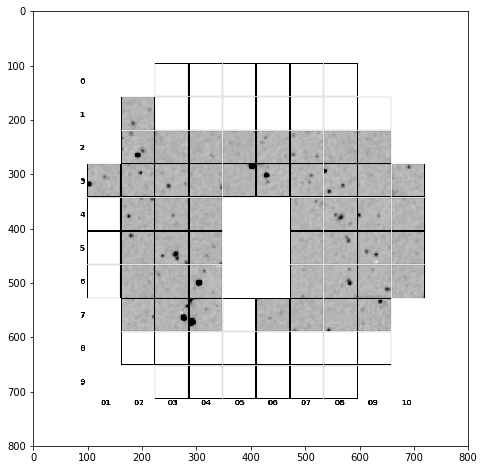

In [12]:
plt.figure(figsize=(14,8))
plt.imshow(png01)

In [13]:
plt.imsave(datevobs + '_exp01.png',png01)

In [14]:
fits_exp01 = fits.PrimaryHDU(fileh.root.Astrometry.CoaddImages.exp01.read() )

In [15]:
fits_exp01.header = fileh.root.Astrometry.CoaddImages.exp01.attrs['HEADER']
fits_exp01.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1300 / length of data axis 1                          
NAXIS2  =                 1300 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
CRVAL1  =            176.41605                                                  
CRVAL2  =            51.489523                                                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CD1_1   =           -0.0002777                                                  
CD1_2   =                  0.0                                                  
CD2_2   =            0.00027

In [17]:
wcs = WCS(fits_exp01.header)

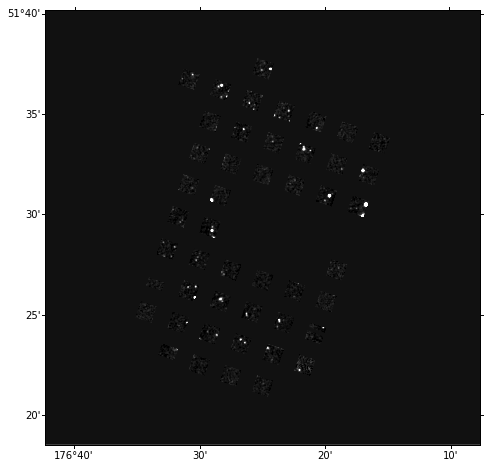

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(projection=wcs)
plt.imshow(fits_exp01.data, vmin=-1.5, vmax=20, cmap=plt.get_cmap('gray'),interpolation="none")

In [20]:
fits_exp01.writeto(datevobs + '.fits', overwrite=True)